In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
class NeuralN(nn.Module):
    def __init__(self):
        super().__init__()
        self.w00 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.b00 = nn.Parameter(torch.rand(1), requires_grad=False)

        self.w01 = nn.Parameter(torch.rand(1), requires_grad=False)
        self.b01 = nn.Parameter(torch.rand(1), requires_grad=False)

        self.w02 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.b02 = nn.Parameter(torch.rand(1), requires_grad=False)

        self.w11 = nn.Parameter(torch.rand(1), requires_grad=False)
        self.w12 = nn.Parameter(torch.rand(1), requires_grad=False)
        self.w13 = nn.Parameter(torch.rand(1), requires_grad=False)

        self.w20 = nn.Parameter(torch.rand(1), requires_grad=True)

    def forward(self, input):
        input_to_layer_01 = input * self.w00 + self.b00
        layer_01_output = torch.sigmoid(input_to_layer_01)
        layer_01_output = layer_01_output * self.w11

        input_to_layer_02 = input * self.w01 + self.b01
        layer_02_output = torch.sigmoid(input_to_layer_02)
        layer_02_output = layer_02_output * self.w12

        input_to_layer_03 = input * self.w02 + self.b02
        layer_03_output = torch.sigmoid(input_to_layer_03)
        layer_03_output = layer_03_output * self.w13

        output = layer_01_output + layer_02_output + layer_03_output

        output = torch.tanh(output)
        output = output * self.w20
        return output

In [4]:
my_model=NeuralN()

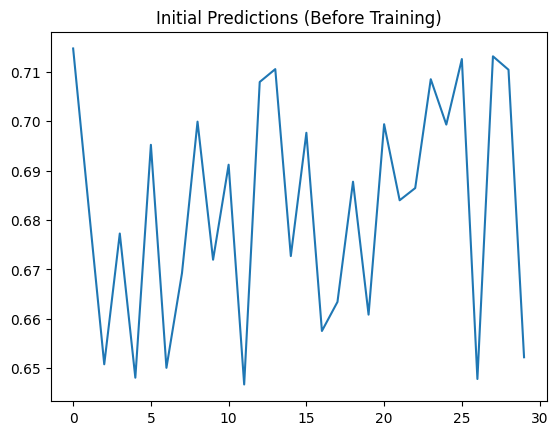

In [5]:
input_data = torch.rand(10, 3)  # Random input of size (10, 3)
predictions_before_training = my_model(input_data).detach().numpy()

# Visualize initial predictions
sns.lineplot(data=predictions_before_training.flatten())
plt.title('Initial Predictions (Before Training)')
plt.show()

In [6]:
simpleNN = NeuralN()

In [7]:
X = torch.linspace(start=1, end=2.5, steps=40)
X

tensor([1.0000, 1.0385, 1.0769, 1.1154, 1.1538, 1.1923, 1.2308, 1.2692, 1.3077,
        1.3462, 1.3846, 1.4231, 1.4615, 1.5000, 1.5385, 1.5769, 1.6154, 1.6538,
        1.6923, 1.7308, 1.7692, 1.8077, 1.8462, 1.8846, 1.9231, 1.9615, 2.0000,
        2.0385, 2.0769, 2.1154, 2.1538, 2.1923, 2.2308, 2.2692, 2.3077, 2.3462,
        2.3846, 2.4231, 2.4615, 2.5000])

In [8]:
Y = my_model(X)
Y

tensor([0.7191, 0.7209, 0.7225, 0.7242, 0.7257, 0.7272, 0.7287, 0.7301, 0.7315,
        0.7328, 0.7340, 0.7352, 0.7364, 0.7375, 0.7386, 0.7397, 0.7407, 0.7416,
        0.7426, 0.7435, 0.7444, 0.7452, 0.7460, 0.7468, 0.7475, 0.7483, 0.7490,
        0.7496, 0.7503, 0.7509, 0.7515, 0.7521, 0.7527, 0.7532, 0.7538, 0.7543,
        0.7548, 0.7552, 0.7557, 0.7561], grad_fn=<MulBackward0>)

In [9]:
newY=simpleNN(X)

In [10]:
newY

tensor([0.6755, 0.6765, 0.6774, 0.6782, 0.6791, 0.6799, 0.6807, 0.6815, 0.6822,
        0.6829, 0.6836, 0.6843, 0.6849, 0.6855, 0.6861, 0.6867, 0.6873, 0.6878,
        0.6883, 0.6888, 0.6893, 0.6898, 0.6903, 0.6907, 0.6912, 0.6916, 0.6920,
        0.6924, 0.6927, 0.6931, 0.6935, 0.6938, 0.6942, 0.6945, 0.6948, 0.6951,
        0.6954, 0.6957, 0.6960, 0.6962], grad_fn=<MulBackward0>)

Text(0, 0.5, 'Y')

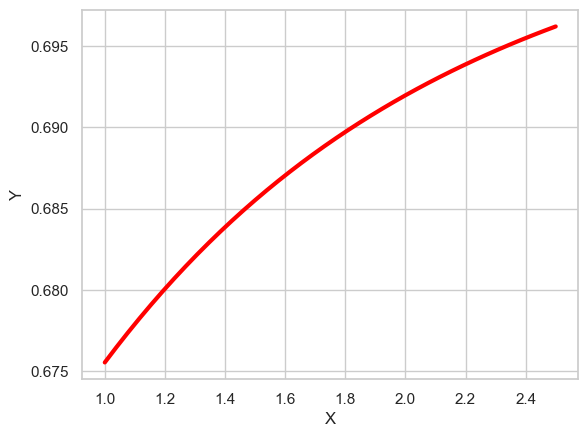

In [11]:
sns.set(style="whitegrid")

sns.lineplot(
    x=X,
    y=newY.detach(),
    color='red',
    linewidth=3
)


plt.xlabel('X')
plt.ylabel('Y')

In [12]:
optimizer = optim.SGD(simpleNN.parameters(), lr=0.01)
loss = nn.MSELoss()


In [13]:
for epoch in range(100):
    total_loss = 0

    for i in range(len(X)):
        input_i = X[i]
        actual_output_i = Y[i]

        pred_output_i = simpleNN(input_i)

        loss_value = loss(pred_output_i, actual_output_i)

        # Retain the graph for multiple backward passes
        loss_value.backward(retain_graph=True)

        total_loss += loss_value

    print('Epoch: ', epoch, ' | Total Loss: ', total_loss)
    optimizer.step()
    optimizer.zero_grad()


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:  0  | Total Loss:  tensor(0.1165, grad_fn=<AddBackward0>)
Epoch:  1  | Total Loss:  tensor(0.0116, grad_fn=<AddBackward0>)
Epoch:  2  | Total Loss:  tensor(0.0018, grad_fn=<AddBackward0>)
Epoch:  3  | Total Loss:  tensor(0.0008, grad_fn=<AddBackward0>)
Epoch:  4  | Total Loss:  tensor(0.0007, grad_fn=<AddBackward0>)
Epoch:  5  | Total Loss:  tensor(0.0007, grad_fn=<AddBackward0>)
Epoch:  6  | Total Loss:  tensor(0.0007, grad_fn=<AddBackward0>)
Epoch:  7  | Total Loss:  tensor(0.0007, grad_fn=<AddBackward0>)
Epoch:  8  | Total Loss:  tensor(0.0007, grad_fn=<AddBackward0>)
Epoch:  9  | Total Loss:  tensor(0.0007, grad_fn=<AddBackward0>)
Epoch:  10  | Total Loss:  tensor(0.0007, grad_fn=<AddBackward0>)
Epoch:  11  | Total Loss:  tensor(0.0007, grad_fn=<AddBackward0>)
Epoch:  12  | Total Loss:  tensor(0.0007, grad_fn=<AddBackward0>)
Epoch:  13  | Total Loss:  tensor(0.0007, grad_fn=<AddBackward0>)
Epoch:  14  | Total Loss:  tensor(0.0007, grad_fn=<AddBackward0>)
Epoch:  15  | Total 

In [14]:
pred_y = simpleNN(X)
pred_y

tensor([0.7284, 0.7294, 0.7303, 0.7313, 0.7322, 0.7331, 0.7339, 0.7347, 0.7355,
        0.7363, 0.7370, 0.7378, 0.7385, 0.7391, 0.7398, 0.7404, 0.7410, 0.7416,
        0.7422, 0.7427, 0.7432, 0.7438, 0.7443, 0.7447, 0.7452, 0.7457, 0.7461,
        0.7465, 0.7469, 0.7473, 0.7477, 0.7481, 0.7484, 0.7488, 0.7491, 0.7494,
        0.7498, 0.7501, 0.7504, 0.7507], grad_fn=<MulBackward0>)

Text(0, 0.5, 'Y')

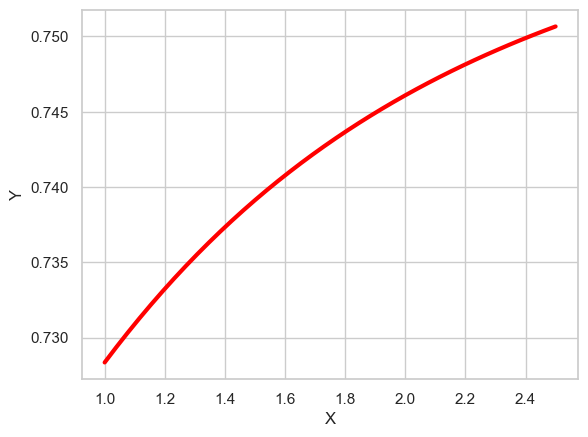

In [15]:
sns.set(style="whitegrid")

sns.lineplot(
    x=X,
    y=pred_y.detach(),
    color='red',
    linewidth=3
)


plt.xlabel('X')
plt.ylabel('Y')